# Equation Solving

In [1]:
from scipy import linalg as la
from scipy import optimize

import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

from __future__ import division

In [3]:
A = sympy.Matrix([[2,3],[5,4]])
b = sympy.Matrix([4,3])

In [4]:
A.rank()

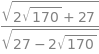

In [5]:
A.condition_number()

In [6]:
sympy.N(_)

In [7]:
A.norm()

In [8]:
A = np.array([[2,3],[5,4]])
b = np.array([4,3])

In [9]:
np.linalg.matrix_rank(A)

2

In [10]:
np.linalg.cond(A)

In [11]:
np.linalg.norm(A)

In [12]:
A = sympy.Matrix([[2,3],[5,4]])
b = sympy.Matrix([4,3])

In [13]:
L,U, _ = A.LUdecomposition()
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [14]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [15]:
L*U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [16]:
x = A.solve(b)
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [17]:
A = np.array([[2,3],[5,4]])
b = np.array([4,3])

In [18]:
P,L,U = la.lu(A)
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [19]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [20]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [21]:
la.solve(A,b)

array([-1.,  2.])

In [23]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1,sympy.sqrt(p)], [1,1/sympy.sqrt(p)]])
b = sympy.Matrix([1,2])
x = A.solve(b)
x

⎡2⋅p - 1 ⎤
⎢─────── ⎥
⎢ p - 1  ⎥
⎢        ⎥
⎢   1    ⎥
⎢────────⎥
⎢      1 ⎥
⎢-√p + ──⎥
⎣      √p⎦

In [24]:
x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()

In [25]:
AA = lambda p:np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1,2])
x_num_sol = lambda p:np.linalg.solve(AA(p), bb)

Text(0.5, 0, '$p$')

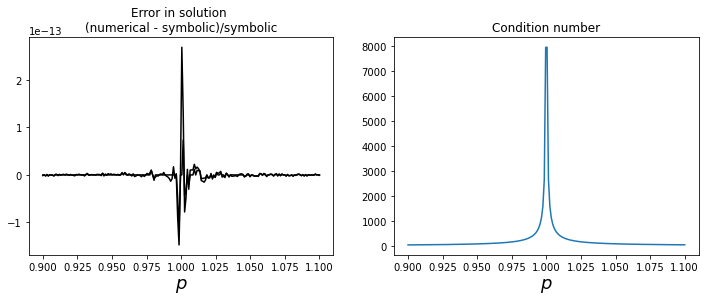

In [29]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

p_vec = np.linspace(0.9, 1.1, 200)

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p,pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')

axes[0].set_title("Error in solution \n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r"$p$", fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p,pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r"$p$", fontsize=18)

In [30]:
x_vars = sympy.symbols("x_1, x_2, x_3")
A = sympy.Matrix([[1,2,3], [4,5,6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7,8])
sympy.solve(A*x - b, x_vars)

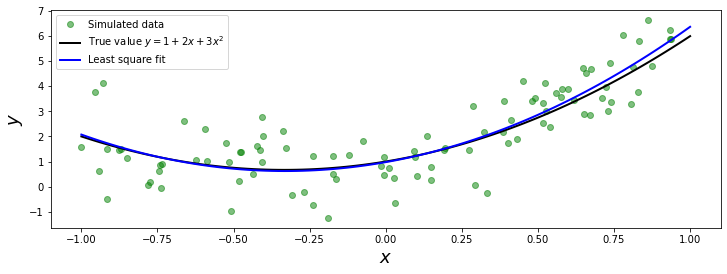

In [32]:
x = np.linspace(-1,1,100)
a,b,c = 1,2,3
y_exact = a+b*x+c*x**2

m = 100
X = 1-2*np.random.rand(m)
Y = a+b*X+c*X**2 + np.random.randn(m)

A = np.vstack([X**0, X**1, X**2])
sol, r , rank, sv = la.lstsq(A.T, Y)

y_fit = sol[0]+sol[1]*x+sol[2]*x**2
fig,ax = plt.subplots(figsize=(12,4))

ax.plot(X,Y, 'go', alpha = 0.5, label = "Simulated data")
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1+2x+3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')

ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$y$",fontsize=18)
ax.legend(loc=2)

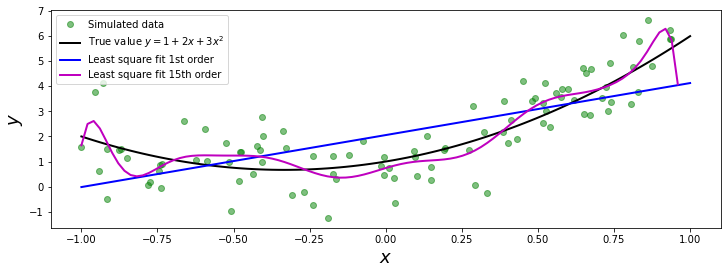

In [46]:
A = np.vstack([X**n for n in range(2)])
sol, r , rank, sv = la.lstsq(A.T, Y)

y_fit1 = sum([s*x**n for n,s in enumerate(sol)])

A = np.vstack([X**n for n in range(16)])
sol, r , rank, sv = la.lstsq(A.T, Y)

y_fit15 = sum([s*x**n for n,s in enumerate(sol)])

fig,ax = plt.subplots(figsize=(12,4))

ax.plot(X,Y, 'go', alpha = 0.5, label = "Simulated data")
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1+2x+3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit 1st order')
ax.plot(x[:-2], y_fit15[:-2], 'm', lw=2, label='Least square fit 15th order')

ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$y$",fontsize=18)
ax.legend(loc=2)



In [47]:
eps, delta = sympy.symbols("epsilon, Delta")
H = sympy.Matrix([[eps, delta], [delta,-eps]])
H

⎡ε  Δ ⎤
⎢     ⎥
⎣Δ  -ε⎦

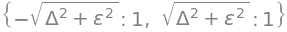

In [48]:
H.eigenvals()

In [49]:
H.eigenvects()

⎡⎛                  ⎡⎡       _________⎤⎤⎞  ⎛                 ⎡⎡       ________
⎢⎜    _________     ⎢⎢      ╱  2    2 ⎥⎥⎟  ⎜   _________     ⎢⎢      ╱  2    2
⎢⎜   ╱  2    2      ⎢⎢ε   ╲╱  Δ  + ε  ⎥⎥⎟  ⎜  ╱  2    2      ⎢⎢ε   ╲╱  Δ  + ε 
⎢⎜-╲╱  Δ  + ε  , 1, ⎢⎢─ - ────────────⎥⎥⎟, ⎜╲╱  Δ  + ε  , 1, ⎢⎢─ + ───────────
⎢⎜                  ⎢⎢Δ        Δ      ⎥⎥⎟  ⎜                 ⎢⎢Δ        Δ     
⎢⎜                  ⎢⎢                ⎥⎥⎟  ⎜                 ⎢⎢               
⎣⎝                  ⎣⎣       1        ⎦⎦⎠  ⎝                 ⎣⎣       1       

_⎤⎤⎞⎤
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
─⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎦⎦⎠⎦

In [51]:
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()
sympy.simplify(evec1[0].T*evec2[0])

[0]

In [52]:
A = np.array([[1,3,5], [3,5,3], [5,3,9]])
evals, evecs = la.eig(A)
evals

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [53]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [54]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])

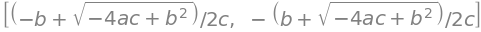

In [70]:
x,a,b,c = sympy.symbols("x,a,b,c")
sympy.solve(a+b*x+c*x**2,x)

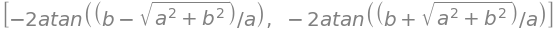

In [71]:
sympy.solve(a*sympy.cos(x)-b*sympy.sin(x), x)

In [72]:
sympy.solve(sympy.sin(x)-x,x)

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation -x + sin(x)

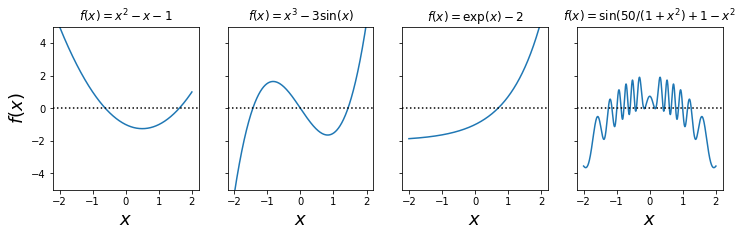

In [81]:
x = np.linspace(-2,2,1000)

f1 = x**2-x-1
f2 = x**3-3*np.sin(x)
f3 = np.exp(x)-2
f4 = 1-x**2+np.sin(50/(1+x**2))

fig, axes = plt.subplots(1,4,figsize=(12,3), sharey = True)

for n, f in enumerate([f1,f2,f3,f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5,5)
    axes[n].set_xticks([-2,-1,0,1,2])
    axes[n].set_xlabel(r'$x$',fontsize=18)
    
axes[0].set_ylabel(r'$f(x)$', fontsize=18)
    
titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',
            r'$f(x)=\exp(x)-2$', r'$f(x)=\sin(50/(1+x^2) + 1-x^2$']
for n,title in enumerate(titles):
    axes[n].set_title(title)

Text(0.5, 1.0, 'Bisection method')

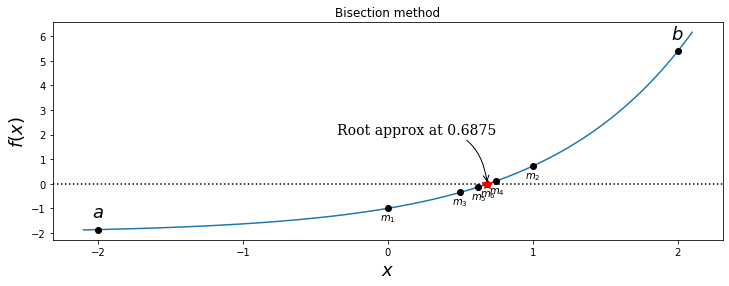

In [90]:
f = lambda x:np.exp(x)-2
tol = 0.1
a,b = -2,2

x = np.linspace(-2.1, 2.1, 1000)

fig, ax = plt.subplots(1,1, figsize=(12,4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color = 'k')
ax.set_xticks([-2,-1,0,1,2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

fa, fb = f(a), f(b)

ax.plot(a,fa,'ko')
ax.plot(b,fb,'ko')
ax.text(a, fa+0.5, r"$a$", ha = 'center', fontsize=18)
ax.text(b, fb+0.5, r"$b$", ha = 'center', fontsize=18)

n = 1
while b-a>tol:
    m = a+(b-a)/2
    fm = f(m)
    
    ax.plot(m,fm, 'ko')
    ax.text(m,fm-0.5, r"$m_{}$".format(n), ha='center')
    
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a,fa = m, fm
    else:
        b,fb = m, fm

ax.plot(m,fm, 'r*', markersize=10)
ax.annotate("Root approx at {}".format(m), fontsize=14, family="serif",
           xy=(a,fm), xycoords = 'data', xytext=(-150,+50),
            textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))
ax.set_title("Bisection method")

Text(0.5, 1.0, "Newton's method")

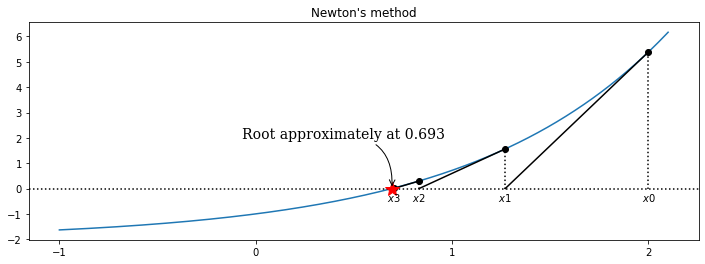

In [99]:
tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x)-2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

fig, ax = plt.subplots(1,1, figsize=(12,4))
ax.plot(x,f(x))
ax.axhline(0, ls=':', color='k')

n = 0
while f(xk)>tol:
    xk_new = xk - f(xk)/fp(xk)
    
    ax.plot([xk, xk], [0,f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -0.5, r'$x{}$'.format(n), ha='center')
    ax.plot([xk, xk_new],[f(xk),0], 'k-')
    xk = xk_new
    n+=1
    
ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
             fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                 connectionstyle="arc3, rad=-.5"))
ax.set_xticks([-1,0,1,2])
ax.set_title("Newton's method")


In [100]:
optimize.bisect(lambda x:np.exp(x) -2, -2,2)

In [101]:
x_root_guess = 2
f = lambda x: np.exp(x)-2
fprime = lambda x: np.exp(x)

optimize.newton(f, x_root_guess)

In [102]:
optimize.newton(f, x_root_guess, fprime=fprime)

In [103]:
optimize.brentq(lambda x:np.exp(x) -2, -2,2)

In [104]:
optimize.brenth(lambda x:np.exp(x) -2, -2,2)

In [105]:
def f(x):
    return [x[1]-x[0]**3 - 2*x[0]**2+1, x[1]+x[0]**2-1]

optimize.fsolve(f, [1,1])

array([0.73205081, 0.46410162])

In [107]:
x,y = sympy.symbols("x,y")
f_mat = sympy.Matrix([y - x**3 - 2*x**2+1, y+x**2-1])
f_mat.jacobian(sympy.Matrix([x,y]))

⎡     2         ⎤
⎢- 3⋅x  - 4⋅x  1⎥
⎢               ⎥
⎣    2⋅x       1⎦

In [108]:
def f_jacobian(x):
    return [[-3*x[0]**2-4*x[0],1], [2*x[0],1]]
optimize.fsolve(f, [1,1], fprime = f_jacobian)

array([0.73205081, 0.46410162])

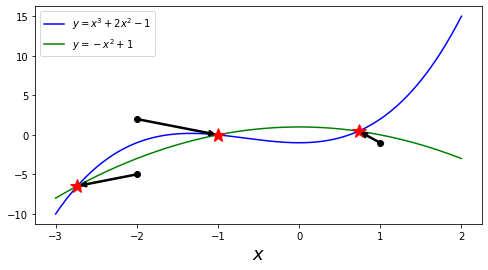

In [115]:
x = np.linspace(-3,2,5000)
y1 = x**3+2*x**2-1
y2 = -x**2+1

fig,ax = plt.subplots(figsize=(8,4))

ax.plot(x,y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x,y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')


x_guesses = [[-2,2], [1,-1], [-2,-5]]

for x_guess in x_guesses:
    sol = optimize.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)
    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0],
            x_guess[1]),
            arrowprops=dict(arrowstyle="->", linewidth=2.5))

ax.set_xlabel(r'$x$', fontsize=18)
ax.legend(loc=0)


/Users/bernardocohen/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0.5, 0, '$x$')

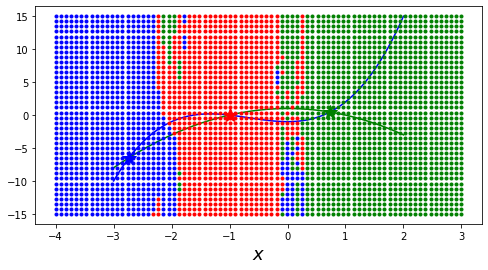

In [118]:
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(x,y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x,y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')

sol1 = optimize.fsolve(f, [-2,2])
sol2 = optimize.fsolve(f, [1,-1])
sol3 = optimize.fsolve(f, [-2,-5])

sols = [sol1, sol2, sol3]

colors = ['r', 'g', 'b']
for idx, s in enumerate(sols):
    ax.plot(s[0], s[1], colors[idx]+'*', markersize=15)



for m in np.linspace(-4,3,80):
    for n in np.linspace(-15,15,40):
        x_guess = [m,n]
        sol = optimize.fsolve(f, x_guess)
        idx = (abs(sols-sol)**2).sum(axis=1).argmin()
        ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')

ax.set_xlabel(r'$x$', fontsize=18)